# Imports

In [116]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as si
import seaborn as sns
import os
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

# Q1a Historical Data  on Binance Coin

In [117]:
data = yf.download("BNB-USD", start="2021-03-25", end="2022-03-25")#Download data from yahoo finance on Binance coin

[*********************100%***********************]  1 of 1 completed


In [118]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-25,249.465912,250.139236,227.294067,234.885437,234.885437,2314734091
2021-03-26,234.790939,255.104568,234.790939,255.104568,255.104568,2099285452
2021-03-27,255.116486,275.593384,250.494797,269.102325,269.102325,2457659540
2021-03-28,269.310730,280.992401,262.288666,269.191284,269.191284,2527142069
2021-03-29,268.969391,277.479004,265.367828,275.214630,275.214630,2067448661


In [119]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-21,390.738953,398.961731,386.561371,396.447815,396.447815,1657341491
2022-03-22,396.355591,409.642548,395.575745,404.314941,404.314941,1795119554
2022-03-23,404.327271,411.029572,398.855865,408.609772,408.609772,1645651129
2022-03-24,408.554260,416.505402,406.011566,414.126984,414.126984,1831451218
2022-03-25,414.148254,421.153717,406.296051,410.811157,410.811157,1678265707


In [120]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,438.760298,454.494241,421.132275,439.055449,439.055449,2.687157e+09
std,103.647342,106.034265,100.671522,102.883794,102.883794,1.627601e+09
min,234.790939,250.139236,213.516464,234.885437,234.885437,1.113777e+09
25%,361.370636,376.834061,341.037468,361.878845,361.878845,1.646850e+09
50%,414.840347,430.536682,401.810242,415.116196,415.116196,2.148677e+09
75%,520.621353,534.777893,502.855972,520.039993,520.039993,3.163296e+09
max,676.315918,690.931946,634.549500,675.684082,675.684082,1.443632e+10


# Spot Price of Binance Coin as at 25-03-2022

In [121]:
S = data['Adj Close'][-1]
print('The spot price for BNB-USD is', round(S,2))

The spot price for BNB-USD is 410.81


# Date of minimum closing price

In [122]:
data[data["Adj Close"] == data["Adj Close"].min()]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-25,249.465912,250.139236,227.294067,234.885437,234.885437,2314734091


# Date of maximum closing price

In [123]:
data[data["Adj Close"] == data["Adj Close"].max()]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-03,621.90271,679.815002,621.90271,675.684082,675.684082,5274868721


In [124]:
data['Adj Close'].head()

Date
2021-03-25    234.885437
2021-03-26    255.104568
2021-03-27    269.102325
2021-03-28    269.191284
2021-03-29    275.214630
Name: Adj Close, dtype: float64

# Q1.b Price movement of Binance coin over one-year period

Text(0.5, 1.0, 'Binance Coin Price')

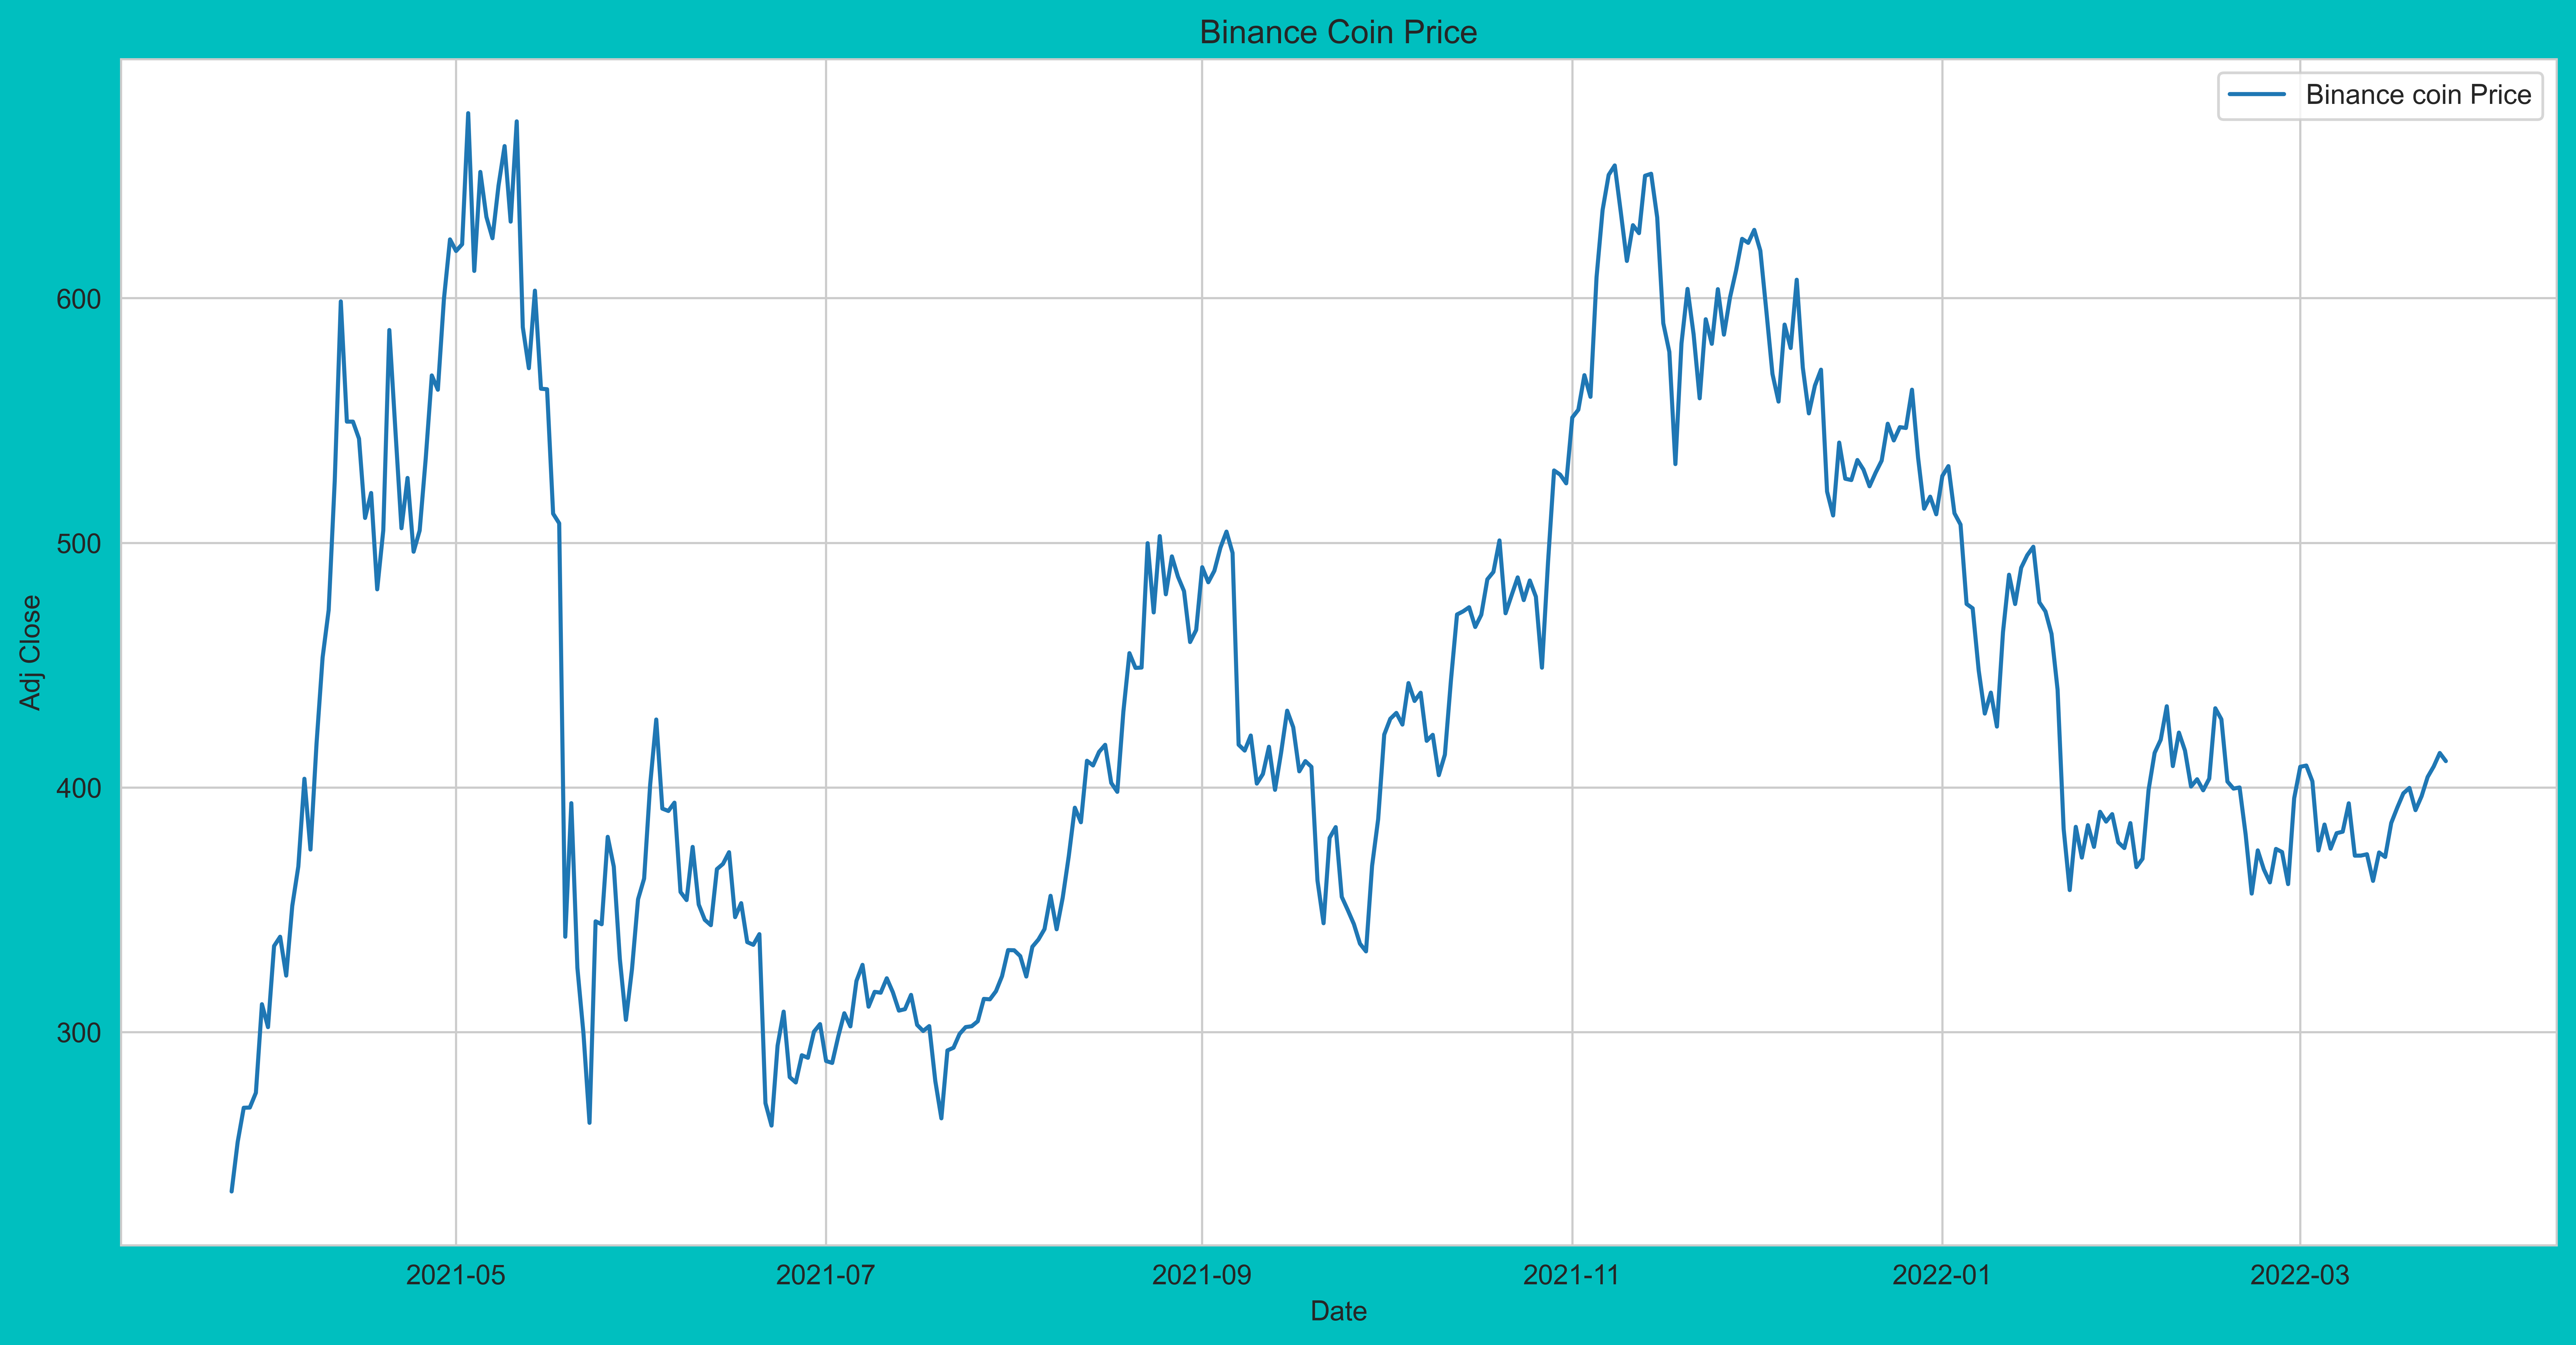

In [125]:
plt.figure(figsize=[16, 8], facecolor="c", dpi=550)
sns.set_style(style="whitegrid")
sns.lineplot(data.index, data["Adj Close"])
#sns.lineplot(data.index, data["Adj Close"].rolling(window=20).mean())
plt.legend(["Binance coin Price","Moving Average"])
plt.title("Binance Coin Price")

In [126]:
normal_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[0.0860808218975185,
 0.05487066359231399,
 0.00033057588814627446,
 0.02237570939794986,
 0.13157677341004606]

In [127]:
log_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[0.08257564037934838,
 0.05341816566144049,
 0.00033052125997615,
 0.0221290459453118,
 0.12361203479281384]

# Q1.B  ANNUALIZED VOLATILITY

In [128]:
dfnr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = dfnr.mean() * len(dfnr)
nv = dfnr.std() * (len(dfnr) ** 0.5)
print('The annulized log return is %.8f and its annulized volatility is %.8f' % (nr,nv))

The annulized log return is 1.14151691 and its annulized volatility is 1.07034435


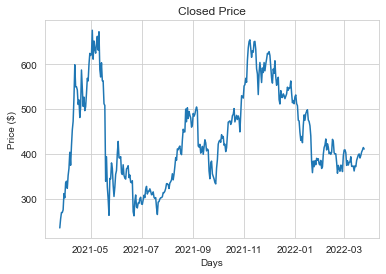

In [129]:
fig = plt.figure()
plt.plot(data['Close'])
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.title('Closed Price');

# Q2. a Designing a Derivative

# Binary Option

# Bionomial Tree


In [60]:
S0 = 410.81            # spot Binance coin price as at 25/03/20224
K = 450                 # strike price( I assumed the strike price to be $450.00 based analyis of the historical prices )
T = 1/12                 # maturity of the Crytocurrency (one month will be the maturity of the Coin)
r = 0.0152                # risk free rate  as at 25/03/2022
sig = 1.0703             # diffusion coefficient or volatility
N = 3                   # number of periods or number of time steps  
payoff = "put"          # payoff 

In [61]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u  

In [62]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [63]:
S

array([[410.81      , 491.03438399, 586.92526049, 701.54203581],
       [  0.        , 343.69254293, 410.81      , 491.03438399],
       [  0.        ,   0.        , 287.54062478, 343.69254293],
       [  0.        ,   0.        ,   0.        , 240.56271397]])

In [64]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.456699511282881

In [65]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , 106.30745707],
       [  0.        ,   0.        ,   0.        , 209.43728603]])

In [66]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 76.48309702,  31.35286147,   0.        ,   0.        ],
       [  0.        , 114.47911696,  57.73251228,   0.        ],
       [  0.        ,   0.        , 162.26941533, 106.30745707],
       [  0.        ,   0.        ,   0.        , 209.43728603]])

In [67]:
print('European ' + payoff, str( V[0,0]))

European put 76.48309702228975


# Monte Carlo Simulation

In [68]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [69]:
T = 1/12          #option time period
r = 0.0152        #Risk free rate as at 25/03/2022
sigma = 1.0703    #Volatility rate
S0 = 410.81      #Spot price
K = 450.0       #Strike price

In [70]:
S = mcs_simulation_np(1000)

In [71]:
S = np.transpose(S)
S

array([[410.81      , 411.89441486, 409.77005357, ..., 453.60722431,
        455.14199833, 452.9945999 ],
       [410.81      , 411.74508499, 411.36036371, ..., 650.64793766,
        657.8419245 , 648.15880524],
       [410.81      , 407.6682921 , 403.03384259, ..., 442.50543902,
        442.08585184, 447.23878465],
       ...,
       [410.81      , 407.67542568, 405.26364778, ..., 290.6235829 ,
        290.10190541, 294.19029944],
       [410.81      , 412.81611918, 412.00381278, ..., 327.72510029,
        327.89080199, 328.98373676],
       [410.81      , 417.56203008, 424.93187483, ..., 219.69559728,
        218.65352779, 222.24278965]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

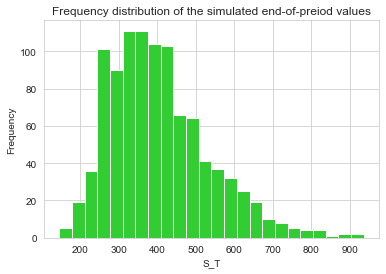

In [72]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#32cd32',alpha=1, rwidth=2.5)

plt.grid(axis='y', alpha=0.95)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [73]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 78.8479154499736


# Black Scholes Model
# European Option for non-dividend paying coin(Binance coin)

In [74]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [75]:
euro_option_bs(410.81, 450, 1/12, 0.0107, 1.43, 'put')
print('European BSM put', str(p))

European BSM put 78.8479154499736


# Q3 Greeks

# Delta

Delta, ∆, measures the rate of change of the theoretical option value with respect to changes in the underlying asset's price. Delta is the first derivative of the value V of the option with respect to the underlying instrument's price S.

In [76]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [77]:
S = np.linspace(300, 700, 150)
T = np.linspace(0.5, 2, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j],450, T[i], 0.0152, 0, 1.0703, 'call')

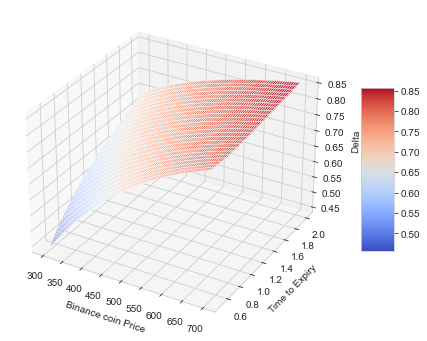

In [78]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Binance coin Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [79]:
d = delta(410.81, 450, 1/12, 0.0152, 0, 1.0703, 'put')#Delta for one month
print('The value of Delta is', d.round(4),'.','If Binance price increase 1 dollar, then the value of the option will decrease $', d.round(4), '.')

The value of Delta is -0.5542 . If Binance price increase 1 dollar, then the value of the option will decrease $ -0.5542 .


# Gamma
Gamma, Γ, measures the rate of change in the delta with respect to changes in the underlying price. Gamma is the second derivative of the value function with respect to the underlying price.

In [80]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [81]:
gamma(410.81, 450, 1/12, 0.0152, 0, 1.0703, 'put')#Gamma for one-month option
print('The Gamma for the put option is', d.round(4),'.','If Binance coin price increase by 1 dollar, then the value of the Gamma will decrease $', d.round(4), '.')

The Gamma for the put option is -0.5542 . If Binance coin price increase by 1 dollar, then the value of the Gamma will decrease $ -0.5542 .


In [82]:
S = np.linspace(200, 700, 150)
T = np.linspace(0.5, 2, 150)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 450, T[i], 0.0152, 0, 1.0703, 'call')

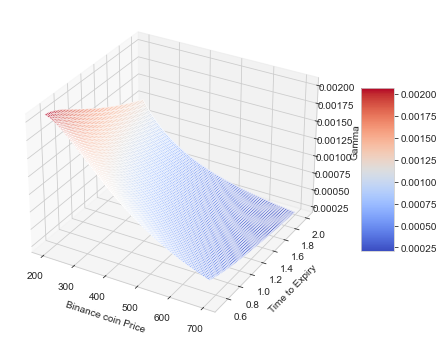

In [83]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Binance coin Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Speed
Speed measures the rate of change in Gamma with respect to changes in the underlying price.

In [84]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [85]:
speed(410.81, 450, 1/12, 0.0152, 0, 1.0703, 'put')

-1.2227341973885762e-06

In [86]:
S = np.linspace(200, 700, 150)
T = np.linspace(0.5, 2, 150)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 450, T[i], 0.0152, 0, 1.0703, 'put')

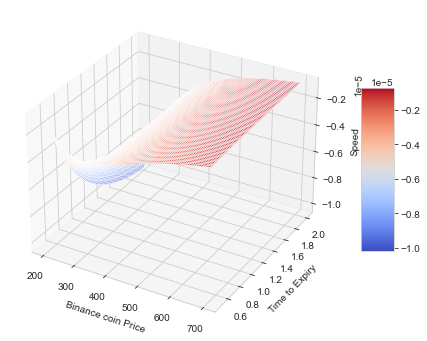

In [87]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Binance coin Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Theta
Theta, 𝜃, measures the sensitivity of the value of the derivative to the passage of time (see Option time value): the "time decay"

In [88]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [89]:
theta(410.81, 450, 1/12, 0.0152, 0, 1.0703, 'put')

305.60092689050776

In [90]:
S = np.linspace(200, 700, 150)
T = np.linspace(0.5, 2, 150)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 450, T[i], 0.0152, 0, 1.0703, 'call')

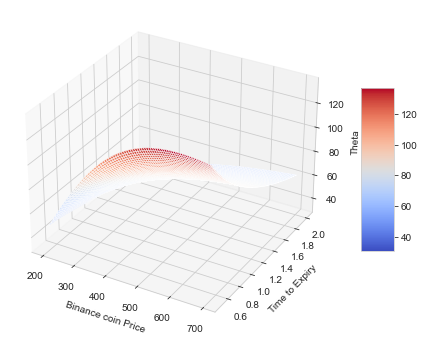

In [91]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Binance coin Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Rho
Rho, 𝜌, measures sensitivity to the interest rate: it is the derivative of the option value with respect to the risk free interest rate (for the relevant outstanding term).

In [92]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [93]:
rho(410.81, 450, 1/12, 0.0152, 0, 1.0703, 'put')

-25.1660459566478

In [94]:
S = np.linspace(200, 700, 150)
T = np.linspace(0.5, 2, 150)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 450, T[i], 0.0152, 0, 1.0703, 'put')

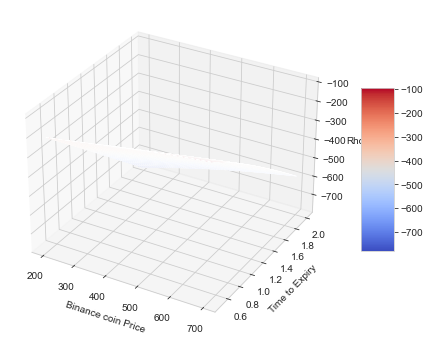

In [95]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Binance coin Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Vega
Vega measures sensitivity to volatility. Vega is the derivative of the option value with respect to the volatility of the underlying asset.

In [96]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [97]:
v = vega(410.81, 450, 1/12, 0.0152, 0, 1.0703, 'put')
print('The value of Vega is', v.round(4),'.','If the volatility increases by 1%, then the value of the option will increase by $', v.round(4)*0.01, '.')

The value of Vega is 46.8733 . If the volatility increases by 1%, then the value of the option will increase by $ 0.468733 .


In [98]:
S = np.linspace(200, 700, 150)
T = np.linspace(0.5, 2, 150)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 450, T[i], 0.0152, 0, 1.0703, 'call')

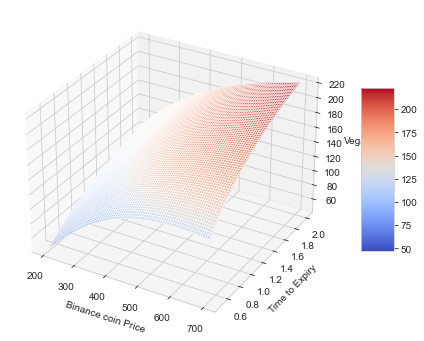

In [99]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Binance coin Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);